# Latihan 1 | Term Frequency

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
corpus = [
            'The greatest glory in living lies not in never falling, but in rising every time we fall.',
            'The way to get started is to quit talking and begin doing.',
            'If life were predictable it would cease to be life, and be without flavor.',
            'Life is what happens when you are busy making other plans.',
]

X = vectorizer.fit_transform(corpus)

In [5]:
print(vectorizer.get_feature_names())

['and', 'are', 'be', 'begin', 'busy', 'but', 'cease', 'doing', 'every', 'fall', 'falling', 'flavor', 'get', 'glory', 'greatest', 'happens', 'if', 'in', 'is', 'it', 'lies', 'life', 'living', 'making', 'never', 'not', 'other', 'plans', 'predictable', 'quit', 'rising', 'started', 'talking', 'the', 'time', 'to', 'way', 'we', 'were', 'what', 'when', 'without', 'would', 'you']


In [6]:
X.toarray()

vectorizer.transform(['The glory glory you.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
      dtype=int64)

# Latihan 2 | Term Frequency – Inverse Document Frequency

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)

tfidf = transformer.fit_transform(X)

tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.21080243, 0.        , 0.        , 0.21080243, 0.21080243,
        0.21080243, 0.        , 0.        , 0.21080243, 0.21080243,
        0.        , 0.        , 0.63240729, 0.        , 0.        ,
        0.21080243, 0.        , 0.21080243, 0.        , 0.21080243,
        0.21080243, 0.        , 0.        , 0.        , 0.        ,
        0.21080243, 0.        , 0.        , 0.14957063, 0.21080243,
        0.        , 0.        , 0.21080243, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.21871556, 0.        , 0.        , 0.30825419, 0.        ,
        0.        , 0.        , 0.30825419, 0.        , 0.        ,
        0.        , 0.        , 0.30825419, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.21871556, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3

# Latihan 3 | Word2Vec

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

sample = open("./alice_in_wonderland.txt", "r")
s = sample.read()

f = s.replace("\n", " ")

data = []

for i in sent_tokenize(f):
    temp = []
    
    for j in word_tokenize(i):
        temp.append(j.lower())
        
    data.append(temp)
    
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5)

In [9]:
print("Consin similarity between 'alice' " + "and 'wonderland' - CBOW : ",
    model1.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " + "and 'machines' - CBOW : ",
     model1.similarity('alice', 'machines'))

Consin similarity between 'alice' and 'wonderland' - CBOW :  0.9981234
Cosine similarity between 'alice' and 'machines' - CBOW :  0.98486423


In [10]:
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)

print("Consin similarity between 'alice' " + "and 'wonderland' - Skip Gram : ",
    model2.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " + "and 'machines' - Skip Gram : ",
     model2.similarity('alice', 'machines'))

Consin similarity between 'alice' and 'wonderland' - Skip Gram :  0.93657476
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.91462934


# Latihan 4 | Plot Word Vectors Using PCA

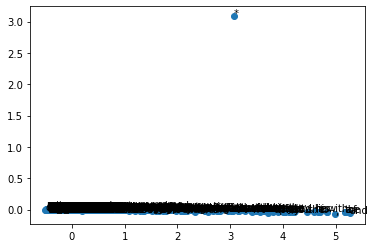

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

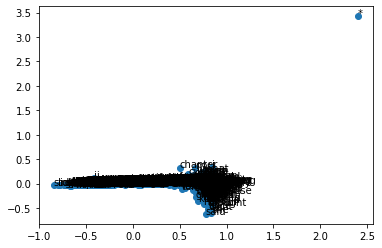

In [12]:
X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()